## SVM Classifier




 Equation of the Hyperplane:

 #### y = wx - b



### Gradient Descent:-
    is an optimization algorism used for minimizing the
    loss function in various machine learning algorisms.
    it's used for updating the parameters of learning
    model.

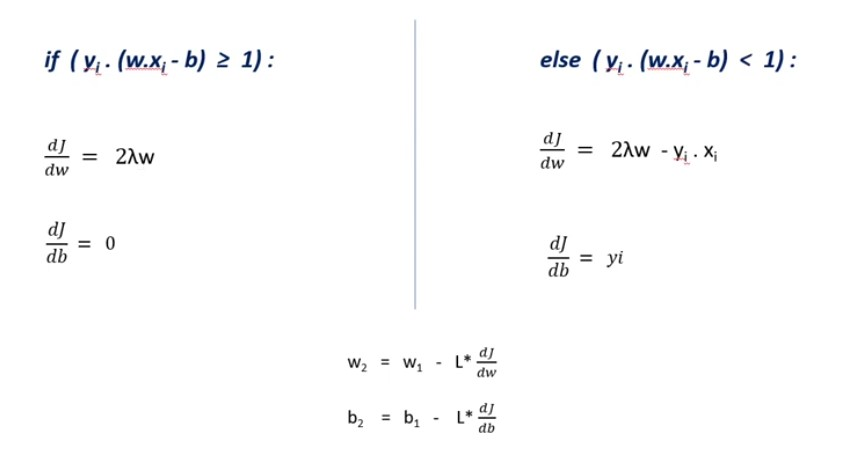

#### w = w - a * dw
#### b = b - a * db

### Learning Rate:-
    is tuning parameter in an optimization algorism that
    determines the step size at each iteration while
    moving toward a minimum of a loss function. 

## Buliding Suppport Vector Machine Classifier

In [1]:
## import dependencies
import numpy as np

class SVMC:
    def __init__(self, learning_rate, no_of_iterations, lambda_parameter):
        
        # initating the parameters (learning rate,number of iterations)
        self.learning_rate = learning_rate
        self.no_of_iterations = no_of_iterations
        self.lambda_parameter = lambda_parameter
    def fit(self,X,Y):
        
        #number of training examples and number of features
        self.m,self.n = X.shape #number of rows and columns

        #initating the weight and bias
        self.w = np.zeros(self.n)
        self.b = 0
        self.X = X
        self.Y = Y

        for i in range(self.no_of_iterations):
            self.update_width()
    def update_width(self):

        #label encoding
        Y_label = np.where(self.Y <= 0 ,-1,1)

        # Gradients(dw and db)
        for index,x_i in enumerate(self.X): # display evey item in list and itis index 
            condition = Y_label[index] * (np.dot(x_i,self.w) - self.b) >= 1 

        if condition == True :
            dw = 2 * self.lambda_parameter * self.w
            db = 0
        else : 
            dw = 2 * self.lambda_parameter -  np.dot(x_i, Y_label[index])
            db = Y_label[index]
            

            
        #updating the wights
        self.w = self.w - self.learning_rate * dw
        self.b = self.b - self.learning_rate * db
        
    def predict(self,X):
        output = np.dot(X, self.w) - self.b
        predicted_label = np.sign(output)
        y_hat = np.where(predicted_label <= -1 ,0 ,1)
        return y_hat

## Using logistic regrssion¬∂


### Importing The Dependencies


In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action="ignore")

### Read the data

In [3]:
df = pd.read_csv("/kaggle/input/diabetes-dataset/diabetes.csv")


### Display first 5 rows

In [4]:
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

### Display last 5 rows

In [5]:
df.tail()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0

### Display random 5 rows

In [6]:
df.sample(5)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
745           12      100             84             33      105  30.0   
273            1       71             78             50       45  33.2   
383            1       90             62             18       59  25.1   
503            7       94             64             25       79  33.3   
164            0      131             88              0        0  31.6   

     DiabetesPedigreeFunction  Age  Outcome  
745                     0.488   46        0  
273                     0.422   21        0  
383                     1.268   25        0  
503                     0.738   41        0  
164                     0.743   32        1

### Display number of columns and rows

In [7]:
print("The Shape of DataFrame is: ",df.shape)

The Shape of DataFrame is:  (768, 9)


### some statistical measures

In [8]:
df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [9]:
df.groupby("Outcome").mean()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
Outcome                                                                      
0           3.298000  109.980000      68.184000      19.664000   68.792000   
1           4.865672  141.257463      70.824627      22.164179  100.335821   

               BMI  DiabetesPedigreeFunction        Age  
Outcome                                                  
0        30.304200                  0.429734  31.190000  
1        35.142537                  0.550500  37.067164

In [10]:
df.groupby("Outcome").std()

Pregnancies    Glucose  BloodPressure  SkinThickness     Insulin  \
Outcome                                                                     
0           3.017185  26.141200      18.063075      14.889947   98.865289   
1           3.741239  31.939622      21.491812      17.679711  138.689125   

              BMI  DiabetesPedigreeFunction        Age  
Outcome                                                 
0        7.689855                  0.299085  11.667655  
1        7.262967                  0.372354  10.968254

In [11]:
df["Outcome"].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

1 => Diabetes


0 => Non-Diabetes

<Axes: xlabel='Outcome', ylabel='count'>

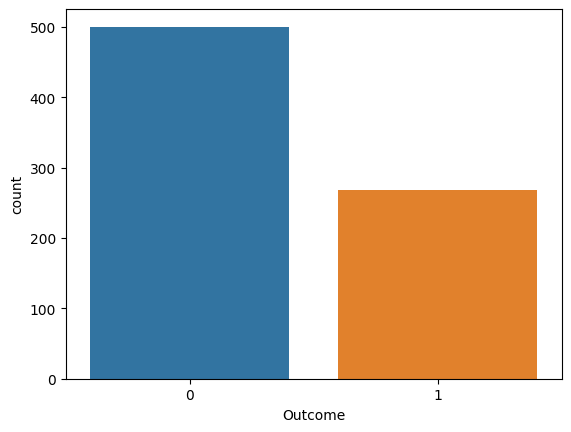

In [12]:
sns.countplot(x='Outcome',data=df)

In [13]:
df.skew()

Pregnancies                 0.901674
Glucose                     0.173754
BloodPressure              -1.843608
SkinThickness               0.109372
Insulin                     2.272251
BMI                        -0.428982
DiabetesPedigreeFunction    1.919911
Age                         1.129597
Outcome                     0.635017
dtype: float64

In [14]:
df.kurt()


Pregnancies                 0.159220
Glucose                     0.640780
BloodPressure               5.180157
SkinThickness              -0.520072
Insulin                     7.214260
BMI                         3.290443
DiabetesPedigreeFunction    5.594954
Age                         0.643159
Outcome                    -1.600930
dtype: float64

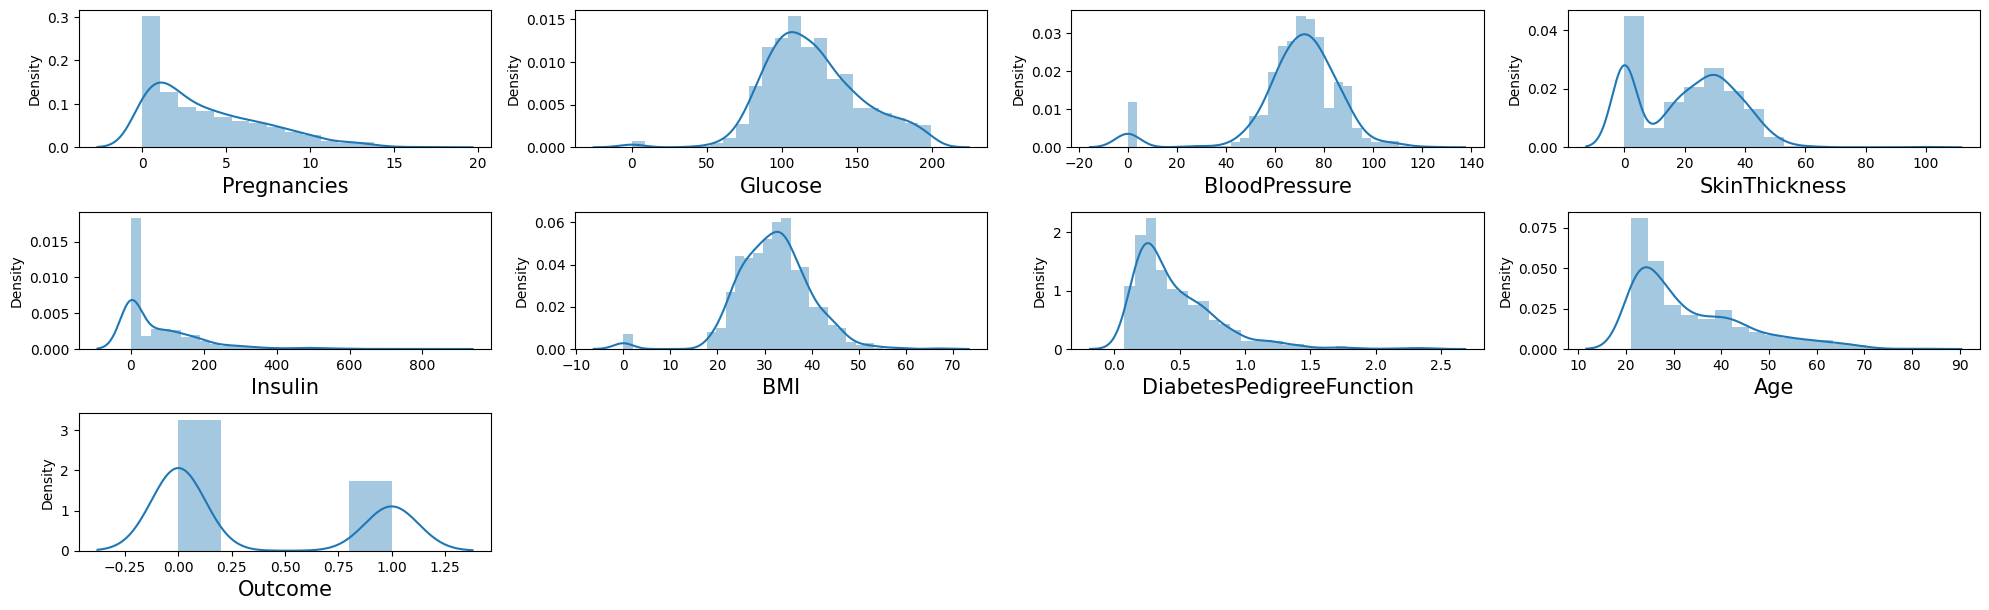

In [15]:
plt.figure(figsize=(20,40))
plotnum = 1
for columns in df:
    if plotnum <= len(df.columns) :
        ax=plt.subplot(20,4,plotnum)
        sns.distplot(df[columns])
        plt.xlabel(columns,fontsize=15)
    plotnum += 1
plt.tight_layout() 
plt.show()

<Axes: >

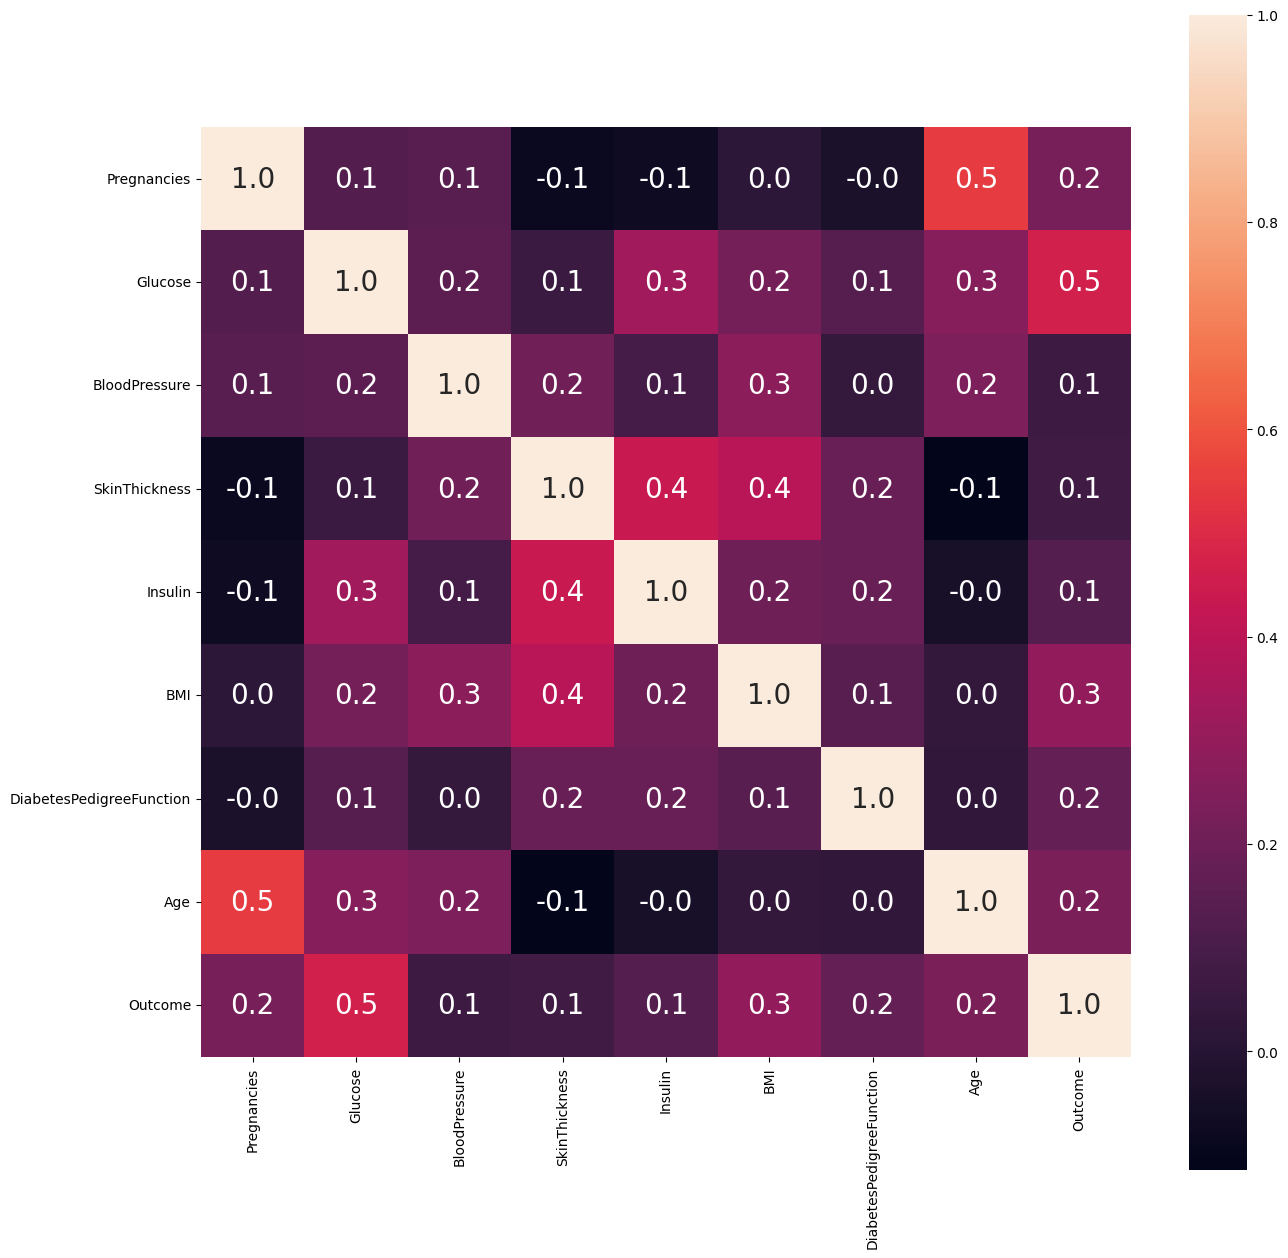

In [16]:
corr=df.corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr,fmt='.1f',cbar=True,square=True,annot=True,annot_kws={'size':20})

### show some informations about dataframe

In [17]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [18]:
print("The Number of Null in DataFrame is: ",df.isnull().sum().sum())
print("The Number of NAN in DataFrame is: ",df.isna().sum().sum())
print("The Number of duplicated in DataFrame is: ",df.duplicated().sum().sum())


The Number of Null in DataFrame is:  0
The Number of NAN in DataFrame is:  0
The Number of duplicated in DataFrame is:  0


### Separating the data

In [19]:
features = df.iloc[:,:-1].values
target = df.iloc[:,-1].values

### Standerized the Data

In [20]:
scaler = StandardScaler()

In [21]:
standerized_features = scaler.fit_transform(features)


In [22]:
standerized_features.std()

1.0

In [23]:
## Train Test split

In [24]:
X_train,X_test,Y_train,Y_test=train_test_split(standerized_features,target,test_size=0.2,random_state=11,stratify=target)

### Train the Model

In [25]:
model = SVMC(learning_rate=0.0001,no_of_iterations=1000,lambda_parameter=0.01)

In [26]:
model.fit(X_train,Y_train)

In [27]:
Y_train_pred = model.predict(X_train)
score1=accuracy_score(Y_train,Y_train_pred)

print("The Accurcy Score of Trainning Data is :  ", score1)

The Accurcy Score of Trainning Data is :   0.5179153094462541


In [28]:
Y_test_pred = model.predict(X_test)
score2=accuracy_score(Y_test,Y_test_pred)

print("The Accurcy Score of testning Data is :  ", score2)

The Accurcy Score of testning Data is :   0.4675324675324675


### Make Prediction System

In [29]:
input_data=(6,148,72,35,0,33.6,0.627,50)
input_as_array=np.asarray(input_data)
input_reshaped=input_as_array.reshape(1,-1)

prediction =model.predict(input_reshaped)
if prediction == 0:
    prediction = "Non-Diabetes"
else :
    prediction = "Diabetes"

print(f"the Final Prediction Is  : {prediction}")

the Final Prediction Is  : Diabetes


In [30]:
## SVMC by clude AI

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

class SVMC:
    def __init__(self, 
                 C=1.0, 
                 learning_rate=0.01, 
                 max_iter=1000, 
                 tol=1e-4, 
                 kernel='linear',
                 gamma='scale',
                 degree=3,
                 coef0=0.0,
                 random_state=None,
                 verbose=False):
        """
        Support Vector Machine Classifier ŸÖÿ≠ÿ≥ŸÜ
        
        Parameters:
        -----------
        C : float, default=1.0
            ŸÖÿπÿßŸÖŸÑ ÿßŸÑÿ™ŸÜÿ∏ŸäŸÖ (ŸÉŸÑŸÖÿß ŸÇŸÑ Cÿå ÿ≤ÿßÿØ ÿßŸÑÿ™ŸÜÿ∏ŸäŸÖ)
        learning_rate : float, default=0.01
            ŸÖÿπÿØŸÑ ÿßŸÑÿ™ÿπŸÑŸÖ
        max_iter : int, default=1000
            ÿ£ŸÇÿµŸâ ÿπÿØÿØ ÿ™ŸÉÿ±ÿßÿ±ÿßÿ™
        tol : float, default=1e-4
            ÿ≠ÿØ ÿßŸÑÿ™ÿ≥ÿßŸÖÿ≠ ŸÑŸÑÿ™ŸàŸÇŸÅ
        kernel : str, default='linear'
            ŸÜŸàÿπ ÿßŸÑŸÄ kernel ('linear', 'rbf', 'poly', 'sigmoid')
        gamma : str or float, default='scale'
            ŸÖÿπÿßŸÖŸÑ kernel ŸÑŸÑŸÄ RBF, poly, sigmoid
        degree : int, default=3
            ÿØÿ±ÿ¨ÿ© polynomial kernel
        coef0 : float, default=0.0
            ŸÖÿµÿ∑ŸÑÿ≠ ŸÖÿ≥ÿ™ŸÇŸÑ ŸÅŸä kernel
        random_state : int, default=None
            ŸÑŸÑÿ™ÿ≠ŸÉŸÖ ŸÅŸä ÿßŸÑÿπÿ¥Ÿàÿßÿ¶Ÿäÿ©
        verbose : bool, default=False
            ŸÑÿ∑ÿ®ÿßÿπÿ© ŸÖÿπŸÑŸàŸÖÿßÿ™ ÿßŸÑÿ™ÿØÿ±Ÿäÿ®
        """
        self.C = C
        self.learning_rate = learning_rate
        self.max_iter = max_iter
        self.tol = tol
        self.kernel = kernel
        self.gamma = gamma
        self.degree = degree
        self.coef0 = coef0
        self.random_state = random_state
        self.verbose = verbose
        
        # ŸÖÿ™ÿ∫Ÿäÿ±ÿßÿ™ ÿØÿßÿÆŸÑŸäÿ©
        self.w = None
        self.b = 0
        self.support_vectors_ = None
        self.support_vector_labels_ = None
        self.n_support_ = None
        self.training_accuracy_ = None
        self.cost_history_ = []
        self.is_fitted_ = False
        
        if random_state is not None:
            np.random.seed(random_state)
    
    def _compute_kernel_matrix(self, X1, X2=None):
        """
        ÿ≠ÿ≥ÿßÿ® kernel matrix
        """
        if X2 is None:
            X2 = X1
            
        if self.kernel == 'linear':
            return np.dot(X1, X2.T)
        
        elif self.kernel == 'rbf':
            if self.gamma == 'scale':
                gamma = 1.0 / (X1.shape[1] * X1.var())
            else:
                gamma = self.gamma
            
            # ÿ≠ÿ≥ÿßÿ® ÿßŸÑŸÖÿ≥ÿßŸÅÿ© ÿßŸÑÿ•ŸÇŸÑŸäÿØŸäÿ©
            sq_dists = np.sum(X1**2, axis=1).reshape(-1, 1) + \
                       np.sum(X2**2, axis=1) - 2 * np.dot(X1, X2.T)
            return np.exp(-gamma * sq_dists)
        
        elif self.kernel == 'poly':
            if self.gamma == 'scale':
                gamma = 1.0 / X1.shape[1]
            else:
                gamma = self.gamma
            return (gamma * np.dot(X1, X2.T) + self.coef0) ** self.degree
        
        elif self.kernel == 'sigmoid':
            if self.gamma == 'scale':
                gamma = 1.0 / X1.shape[1]
            else:
                gamma = self.gamma
            return np.tanh(gamma * np.dot(X1, X2.T) + self.coef0)
    
    def _compute_cost(self, X, y):
        """
        ÿ≠ÿ≥ÿßÿ® ÿØÿßŸÑÿ© ÿßŸÑÿ™ŸÉŸÑŸÅÿ© (Hinge Loss + Regularization)
        """
        if self.kernel == 'linear':
            distances = np.dot(X, self.w) - self.b
        else:
            K = self._compute_kernel_matrix(X, self.X_train)
            distances = np.dot(K, self.alpha * self.y_train) - self.b
        
        # Hinge Loss
        hinge_loss = np.maximum(0, 1 - y * distances)
        
        # ÿ•ÿ¨ŸÖÿßŸÑŸä ÿßŸÑÿ™ŸÉŸÑŸÅÿ©
        if self.kernel == 'linear':
            regularization = 0.5 * np.dot(self.w, self.w)
        else:
            regularization = 0.5 * np.sum(self.alpha**2)
        
        cost = self.C * np.mean(hinge_loss) + regularization
        return cost
    
    def fit(self, X, y):
        """
        ÿ™ÿØÿ±Ÿäÿ® ÿßŸÑŸÜŸÖŸàÿ∞ÿ¨
        """
        # ÿßŸÑÿ™ÿ≠ŸÇŸÇ ŸÖŸÜ ÿµÿ≠ÿ© ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™
        X = np.array(X)
        y = np.array(y)
        
        if X.ndim != 2:
            raise ValueError("X Ÿäÿ¨ÿ® ÿ£ŸÜ ŸäŸÉŸàŸÜ ŸÖÿµŸÅŸàŸÅÿ© ÿ´ŸÜÿßÿ¶Ÿäÿ© ÿßŸÑÿ£ÿ®ÿπÿßÿØ")
        
        self.n_samples_, self.n_features_ = X.shape
        
        # ÿ™ÿ≠ŸàŸäŸÑ ÿßŸÑÿ™ÿµŸÜŸäŸÅÿßÿ™ ÿ•ŸÑŸâ -1 Ÿà 1
        self.classes_ = np.unique(y)
        if len(self.classes_) != 2:
            raise ValueError("ŸäÿØÿπŸÖ Ÿáÿ∞ÿß ÿßŸÑŸÖÿµŸÜŸÅ ÿßŸÑÿ™ÿµŸÜŸäŸÅ ÿßŸÑÿ´ŸÜÿßÿ¶Ÿä ŸÅŸÇÿ∑")
        
        y_binary = np.where(y == self.classes_[0], -1, 1)
        
        # ÿ≠ŸÅÿ∏ ÿ®ŸäÿßŸÜÿßÿ™ ÿßŸÑÿ™ÿØÿ±Ÿäÿ®
        self.X_train = X.copy()
        self.y_train = y_binary.copy()
        
        if self.kernel == 'linear':
            self._fit_linear(X, y_binary)
        else:
            self._fit_kernel(X, y_binary)

        # ÿßŸÑŸÜŸÖŸàÿ∞ÿ¨ ÿ£ÿµÿ®ÿ≠ ŸÖÿØÿ±ÿ® ÿßŸÑÿ¢ŸÜ
        self.is_fitted_ = True  # ‚Üê ÿ∂ÿπ Ÿáÿ∞ÿß ŸÇÿ®ŸÑ ÿ£Ÿä ÿßÿ≥ÿ™ÿØÿπÿßÿ° ŸÑŸÄ predict

        # ÿ≠ÿ≥ÿßÿ® ÿØŸÇÿ© ÿßŸÑÿ™ÿØÿ±Ÿäÿ®
        train_pred = self.predict(X)
        self.training_accuracy_ = accuracy_score(y, train_pred)
    
        # ÿ™ÿ≠ÿØŸäÿØ Support Vectors
        self._find_support_vectors()
        
        self.is_fitted_ = True
        
        if self.verbose:
            print(f"ÿßŸÑÿ™ÿØÿ±Ÿäÿ® ÿßŸÉÿ™ŸÖŸÑ ÿ®ŸÜÿ¨ÿßÿ≠!")
            print(f"ÿØŸÇÿ© ÿßŸÑÿ™ÿØÿ±Ÿäÿ®: {self.training_accuracy_:.4f}")
            print(f"ÿπÿØÿØ Support Vectors: {len(self.support_vectors_)}")
        
        return self
    
    def _fit_linear(self, X, y):
        """
        ÿ™ÿØÿ±Ÿäÿ® ÿßŸÑŸÜŸÖŸàÿ∞ÿ¨ ÿßŸÑÿÆÿ∑Ÿä
        """
        # ÿ™ŸáŸäÿ¶ÿ© ÿßŸÑŸÖÿπÿßŸÖŸÑÿßÿ™
        self.w = np.random.normal(0, 0.01, self.n_features_)
        self.b = 0
        
        prev_cost = float('inf')
        
        for iteration in range(self.max_iter):
            # ÿ≠ÿ≥ÿßÿ® ÿßŸÑÿ™ŸÉŸÑŸÅÿ©
            cost = self._compute_cost(X, y)
            self.cost_history_.append(cost)
            
            # ÿßŸÑÿ™ÿ≠ŸÇŸÇ ŸÖŸÜ ÿßŸÑÿ™ŸÇÿßÿ±ÿ®
            if abs(prev_cost - cost) < self.tol:
                if self.verbose:
                    print(f"ÿ™ŸÇÿßÿ±ÿ® ŸÅŸä ÿßŸÑÿ™ŸÉÿ±ÿßÿ± {iteration}")
                break
            
            prev_cost = cost
            
            # Gradient Descent
            for i in range(self.n_samples_):
                distance = np.dot(X[i], self.w) - self.b
                
                if y[i] * distance >= 1:
                    # ŸÜŸÇÿ∑ÿ© ŸÖÿµŸÜŸÅÿ© ÿ®ÿ¥ŸÉŸÑ ÿµÿ≠Ÿäÿ≠
                    dw = self.w / self.C
                    db = 0
                else:
                    # ŸÜŸÇÿ∑ÿ© ŸÖÿµŸÜŸÅÿ© ÿ®ÿ¥ŸÉŸÑ ÿÆÿßÿ∑ÿ¶ ÿ£Ÿà ŸÅŸä ÿßŸÑŸáÿßŸÖÿ¥
                    dw = self.w / self.C - y[i] * X[i]
                    db = -y[i]
                
                # ÿ™ÿ≠ÿØŸäÿ´ ÿßŸÑŸÖÿπÿßŸÖŸÑÿßÿ™
                self.w = self.w - self.learning_rate * dw
                self.b = self.b - self.learning_rate * db
    
    def _fit_kernel(self, X, y):
        """
        ÿ™ÿØÿ±Ÿäÿ® ÿßŸÑŸÜŸÖŸàÿ∞ÿ¨ ÿ®ÿßÿ≥ÿ™ÿÆÿØÿßŸÖ kernel
        """
        # ÿ™ŸáŸäÿ¶ÿ© ŸÖÿπÿßŸÖŸÑÿßÿ™ Lagrange
        self.alpha = np.random.uniform(0, self.C, self.n_samples_)
        self.b = 0
        
        # ÿ≠ÿ≥ÿßÿ® kernel matrix
        K = self._compute_kernel_matrix(X, X)
        
        prev_cost = float('inf')
        
        for iteration in range(self.max_iter):
            # ÿ™ÿ≠ÿØŸäÿ´ ŸÖÿπÿßŸÖŸÑÿßÿ™ alpha (ŸÜÿ≥ÿÆÿ© ŸÖÿ®ÿ≥ÿ∑ÿ© ŸÖŸÜ SMO)
            for i in range(self.n_samples_):
                # ÿ≠ÿ≥ÿßÿ® ÿßŸÑÿÆÿ∑ÿ£
                error_i = np.sum(self.alpha * y * K[i, :]) - self.b - y[i]
                
                if (y[i] * error_i < -self.tol and self.alpha[i] < self.C) or \
                   (y[i] * error_i > self.tol and self.alpha[i] > 0):
                    
                    # ÿßÿÆÿ™Ÿäÿßÿ± j ÿπÿ¥Ÿàÿßÿ¶ŸäÿßŸã
                    j = np.random.randint(0, self.n_samples_)
                    while j == i:
                        j = np.random.randint(0, self.n_samples_)
                    
                    error_j = np.sum(self.alpha * y * K[j, :]) - self.b - y[j]
                    
                    # ÿ≠ŸÅÿ∏ ÿßŸÑŸÇŸäŸÖ ÿßŸÑŸÇÿØŸäŸÖÿ©
                    alpha_i_old = self.alpha[i]
                    alpha_j_old = self.alpha[j]
                    
                    # ÿ≠ÿ≥ÿßÿ® ÿßŸÑÿ≠ÿØŸàÿØ
                    if y[i] != y[j]:
                        L = max(0, self.alpha[j] - self.alpha[i])
                        H = min(self.C, self.C + self.alpha[j] - self.alpha[i])
                    else:
                        L = max(0, self.alpha[i] + self.alpha[j] - self.C)
                        H = min(self.C, self.alpha[i] + self.alpha[j])
                    
                    if L == H:
                        continue
                    
                    # ÿ≠ÿ≥ÿßÿ® eta
                    eta = 2 * K[i, j] - K[i, i] - K[j, j]
                    if eta >= 0:
                        continue
                    
                    # ÿ™ÿ≠ÿØŸäÿ´ alpha_j
                    self.alpha[j] = alpha_j_old - (y[j] * (error_i - error_j)) / eta
                    
                    # ŸÇÿµ alpha_j
                    self.alpha[j] = max(L, min(H, self.alpha[j]))
                    
                    if abs(self.alpha[j] - alpha_j_old) < 1e-5:
                        continue
                    
                    # ÿ™ÿ≠ÿØŸäÿ´ alpha_i
                    self.alpha[i] = alpha_i_old + y[i] * y[j] * (alpha_j_old - self.alpha[j])
                    
                    # ÿ™ÿ≠ÿØŸäÿ´ b
                    b1 = self.b - error_i - y[i] * (self.alpha[i] - alpha_i_old) * K[i, i] - \
                         y[j] * (self.alpha[j] - alpha_j_old) * K[i, j]
                    b2 = self.b - error_j - y[i] * (self.alpha[i] - alpha_i_old) * K[i, j] - \
                         y[j] * (self.alpha[j] - alpha_j_old) * K[j, j]
                    
                    if 0 < self.alpha[i] < self.C:
                        self.b = b1
                    elif 0 < self.alpha[j] < self.C:
                        self.b = b2
                    else:
                        self.b = (b1 + b2) / 2
            
            # ÿ≠ÿ≥ÿßÿ® ÿßŸÑÿ™ŸÉŸÑŸÅÿ©
            cost = self._compute_cost(X, y)
            self.cost_history_.append(cost)
            
            if abs(prev_cost - cost) < self.tol:
                if self.verbose:
                    print(f"ÿ™ŸÇÿßÿ±ÿ® ŸÅŸä ÿßŸÑÿ™ŸÉÿ±ÿßÿ± {iteration}")
                break
            
            prev_cost = cost
    
    def _find_support_vectors(self):
        """
        ÿ™ÿ≠ÿØŸäÿØ Support Vectors
        """
        if self.kernel == 'linear':
            # ŸÑŸÑŸÄ kernel ÿßŸÑÿÆÿ∑Ÿäÿå ŸÜÿ¨ÿØ ÿßŸÑŸÜŸÇÿßÿ∑ ÿßŸÑŸÇÿ±Ÿäÿ®ÿ© ŸÖŸÜ ÿßŸÑÿ≠ÿØŸàÿØ
            distances = np.abs(np.dot(self.X_train, self.w) - self.b)
            margin = 1.0 / np.linalg.norm(self.w)
            support_mask = distances <= margin * 1.1  # ŸáÿßŸÖÿ¥ ÿµÿ∫Ÿäÿ± ŸÑŸÑÿØŸÇÿ© ÿßŸÑÿπÿØÿØŸäÿ©
        else:
            # ŸÑŸÑŸÄ kernels ÿßŸÑÿ£ÿÆÿ±Ÿâÿå ÿßŸÑŸÜŸÇÿßÿ∑ ŸÖÿπ alpha > 0
            support_mask = self.alpha > 1e-5
        
        self.support_vectors_ = self.X_train[support_mask]
        self.support_vector_labels_ = self.y_train[support_mask]
        self.n_support_ = [np.sum(self.support_vector_labels_ == -1), 
                          np.sum(self.support_vector_labels_ == 1)]
    
    def predict(self, X):
        """
        ÿßŸÑÿ™ŸÜÿ®ÿ§ ÿ®ÿßŸÑÿ™ÿµŸÜŸäŸÅÿßÿ™
        """
        if not self.is_fitted_:
            raise ValueError("Ÿäÿ¨ÿ® ÿ™ÿØÿ±Ÿäÿ® ÿßŸÑŸÜŸÖŸàÿ∞ÿ¨ ÿ£ŸàŸÑÿßŸã")
        
        X = np.array(X)
        if X.ndim == 1:
            X = X.reshape(1, -1)
        
        decision_values = self.decision_function(X)
        predictions = np.where(decision_values >= 0, self.classes_[1], self.classes_[0])
        
        return predictions
    
    def decision_function(self, X):
        """
        ÿ≠ÿ≥ÿßÿ® ŸÇŸäŸÖ ÿßŸÑŸÇÿ±ÿßÿ± (ÿßŸÑŸÖÿ≥ÿßŸÅÿ© ŸÖŸÜ ŸÅÿ±ÿ∑ ÿßŸÑŸÖÿ≥ÿ™ŸàŸâ)
        """
        if not self.is_fitted_:
            raise ValueError("Ÿäÿ¨ÿ® ÿ™ÿØÿ±Ÿäÿ® ÿßŸÑŸÜŸÖŸàÿ∞ÿ¨ ÿ£ŸàŸÑÿßŸã")
        
        X = np.array(X)
        if X.ndim == 1:
            X = X.reshape(1, -1)
        
        if self.kernel == 'linear':
            return np.dot(X, self.w) - self.b
        else:
            K = self._compute_kernel_matrix(X, self.X_train)
            return np.dot(K, self.alpha * self.y_train) - self.b
    
    def predict_proba(self, X):
        """
        ÿßŸÑÿ™ŸÜÿ®ÿ§ ÿ®ÿßŸÑÿßÿ≠ÿ™ŸÖÿßŸÑŸäÿßÿ™ (ÿ™ŸÇÿ±Ÿäÿ®Ÿä)
        """
        decision_values = self.decision_function(X)
        # ÿ™ÿ≠ŸàŸäŸÑ ÿ™ŸÇÿ±Ÿäÿ®Ÿä ŸÑŸÑÿßÿ≠ÿ™ŸÖÿßŸÑŸäÿßÿ™ ÿ®ÿßÿ≥ÿ™ÿÆÿØÿßŸÖ sigmoid
        probs = 1 / (1 + np.exp(-decision_values))
        return np.column_stack([1 - probs, probs])
    
    def score(self, X, y):
        """
        ÿ≠ÿ≥ÿßÿ® ÿØŸÇÿ© ÿßŸÑŸÜŸÖŸàÿ∞ÿ¨
        """
        return accuracy_score(y, self.predict(X))
    
    def plot_decision_boundary(self, X, y, title="SVM Decision Boundary"):
        """
        ÿ±ÿ≥ŸÖ ÿ≠ÿØŸàÿØ ÿßŸÑŸÇÿ±ÿßÿ± (ŸÑŸÑÿ®ŸäÿßŸÜÿßÿ™ ÿ´ŸÜÿßÿ¶Ÿäÿ© ÿßŸÑÿ£ÿ®ÿπÿßÿØ ŸÅŸÇÿ∑)
        """
        if X.shape[1] != 2:
            raise ValueError("ŸäŸÖŸÉŸÜ ÿ±ÿ≥ŸÖ ÿ≠ÿØŸàÿØ ÿßŸÑŸÇÿ±ÿßÿ± ŸÑŸÑÿ®ŸäÿßŸÜÿßÿ™ ÿ´ŸÜÿßÿ¶Ÿäÿ© ÿßŸÑÿ£ÿ®ÿπÿßÿØ ŸÅŸÇÿ∑")
        
        plt.figure(figsize=(8, 8))
        
        # ÿ•ŸÜÿ¥ÿßÿ° ÿ¥ÿ®ŸÉÿ© ŸÑŸÑÿ±ÿ≥ŸÖ
        h = 0.02
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                            np.arange(y_min, y_max, h))
        
        # ÿßŸÑÿ™ŸÜÿ®ÿ§ ÿπŸÑŸâ ÿßŸÑÿ¥ÿ®ŸÉÿ©
        mesh_points = np.c_[xx.ravel(), yy.ravel()]
        Z = self.decision_function(mesh_points)
        Z = Z.reshape(xx.shape)
        
        # ÿ±ÿ≥ŸÖ ÿ≠ÿØŸàÿØ ÿßŸÑŸÇÿ±ÿßÿ±
        plt.contourf(xx, yy, Z, levels=50, alpha=0.8, cmap=plt.cm.RdYlBu)
        plt.contour(xx, yy, Z, levels=[0], colors='black', linestyles='--', linewidths=2)
        
        # ÿ±ÿ≥ŸÖ ÿßŸÑŸÜŸÇÿßÿ∑
        scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu, edgecolors='black')
        
        # ÿ±ÿ≥ŸÖ Support Vectors
        if hasattr(self, 'support_vectors_'):
            plt.scatter(self.support_vectors_[:, 0], self.support_vectors_[:, 1], 
                       s=100, facecolors='none', edgecolors='red', linewidths=2, 
                       label='Support Vectors')
        
        plt.colorbar(scatter)
        plt.xlabel('Feature 1')
        plt.ylabel('Feature 2')
        plt.title(title)
        plt.legend()
        plt.grid(True, alpha=0.3)
        plt.show()
    
    def plot_cost_history(self):
        """
        ÿ±ÿ≥ŸÖ ÿ™ÿßÿ±ŸäÿÆ ÿßŸÑÿ™ŸÉŸÑŸÅÿ© ÿ£ÿ´ŸÜÿßÿ° ÿßŸÑÿ™ÿØÿ±Ÿäÿ®
        """
        plt.figure(figsize=(8, 6))
        plt.plot(self.cost_history_, 'b-', linewidth=2)
        plt.xlabel('Iteration')
        plt.ylabel('Cost')
        plt.title('Training Cost History')
        plt.grid(True, alpha=0.3)
        plt.show()
    
    def get_params(self, deep=True):
        """
        ÿßŸÑÿ≠ÿµŸàŸÑ ÿπŸÑŸâ ŸÖÿπÿßŸÖŸÑÿßÿ™ ÿßŸÑŸÜŸÖŸàÿ∞ÿ¨
        """
        params = {
            'C': self.C,
            'learning_rate': self.learning_rate,
            'max_iter': self.max_iter,
            'tol': self.tol,
            'kernel': self.kernel,
            'gamma': self.gamma,
            'degree': self.degree,
            'coef0': self.coef0,
            'random_state': self.random_state,
            'verbose': self.verbose
        }
        
        if self.is_fitted_:
            params.update({
                'n_support_vectors': len(self.support_vectors_) if hasattr(self, 'support_vectors_') else 0,
                'training_accuracy': self.training_accuracy_,
                'n_iterations': len(self.cost_history_)
            })
        
        return params
    
    def set_params(self, **parameters):
        """
        ÿ™ÿπÿØŸäŸÑ ŸÖÿπÿßŸÖŸÑÿßÿ™ ÿßŸÑŸÜŸÖŸàÿ∞ÿ¨
        """
        for parameter, value in parameters.items():
            setattr(self, parameter, value)
        return self



In [32]:
if __name__ == "__main__":
    from sklearn.preprocessing import StandardScaler
    from sklearn.metrics import accuracy_score, classification_report
    import warnings

    # ÿ™ÿ¨ÿßŸáŸÑ ÿßŸÑÿ™ÿ≠ÿ∞Ÿäÿ±ÿßÿ™ ÿ∫Ÿäÿ± ÿßŸÑÿ∂ÿ±Ÿàÿ±Ÿäÿ©
    warnings.filterwarnings("ignore")

    print("=" * 60)
    print("üöÄ ŸÖÿ´ÿßŸÑ ÿπŸÑŸâ ÿßÿ≥ÿ™ÿÆÿØÿßŸÖ SVM ÿßŸÑŸÖÿ≠ÿ≥ŸÜ ŸÖÿπ ÿ£ŸÜŸàÿßÿπ Kernels ŸÖÿÆÿ™ŸÑŸÅÿ©")
    print("=" * 60)


    # 2. ÿ™ÿ¨ÿ±ÿ®ÿ© ÿπÿØÿ© Kernels
    kernels = ['linear', 'rbf', 'poly']
    
    for kernel in kernels:
        print("=" * 60)
        print(f"üîç ÿ™ÿ¨ÿ±ÿ®ÿ© SVM ÿ®ÿßÿ≥ÿ™ÿÆÿØÿßŸÖ Kernel: {kernel}")
        print("=" * 60)

        try:
            # 3. ÿ•ŸÜÿ¥ÿßÿ° Ÿàÿ™ÿØÿ±Ÿäÿ® ÿßŸÑŸÜŸÖŸàÿ∞ÿ¨
            svm = SVMC(C=1.0, kernel=kernel, max_iter=1000, verbose=True, random_state=42)
            svm.fit(X_train, y_train)

            # 4. ÿßŸÑÿ™ŸÜÿ®ÿ§
            y_pred = svm.predict(X_test_scaled)
            accuracy = accuracy_score(y_test, y_pred)

            print(f"\nüìà ÿØŸÇÿ© ÿßŸÑŸÜŸÖŸàÿ∞ÿ¨ ÿπŸÑŸâ ÿ®ŸäÿßŸÜÿßÿ™ ÿßŸÑÿßÿÆÿ™ÿ®ÿßÿ±: {accuracy:.4f}")
            print(f"üß† ÿπÿØÿØ ÿßŸÑŸÄ Support Vectors: {len(svm.support_vectors_)}")

            # 5. ÿ™ŸÇÿ±Ÿäÿ± ÿßŸÑÿ™ÿµŸÜŸäŸÅ
            print("\nüìã ÿ™ŸÇÿ±Ÿäÿ± ÿßŸÑÿ™ÿµŸÜŸäŸÅ:")
            print(classification_report(y_test, y_pred))

            # 6. ÿ±ÿ≥ŸÖ ÿ≠ÿØŸàÿØ ÿßŸÑŸÇÿ±ÿßÿ±
            svm.plot_decision_boundary(X_test_scaled, y_test, 
                                       title=f"SVM Decision Boundary ({kernel} Kernel)")

            # 7. ÿ±ÿ≥ŸÖ ÿ™ÿßÿ±ŸäÿÆ ÿßŸÑÿ™ŸÉŸÑŸÅÿ© (ÿ•ŸÜ Ÿàÿ¨ÿØ)
            if hasattr(svm, "plot_cost_history"):
                svm.plot_cost_history()

        except Exception as e:
            print(f"\n‚ùå ÿ≠ÿØÿ´ ÿÆÿ∑ÿ£ ÿ£ÿ´ŸÜÿßÿ° ÿ™ÿ¨ÿ±ÿ®ÿ© Kernel = {kernel}: {str(e)}")

    print("\nüèÅ ‚úÖ ÿßŸÜÿ™ŸáŸâ ÿßŸÑŸÖÿ´ÿßŸÑ ÿ®ŸÜÿ¨ÿßÿ≠ ŸÑÿ¨ŸÖŸäÿπ ÿßŸÑŸÄ Kernels.")


üöÄ ŸÖÿ´ÿßŸÑ ÿπŸÑŸâ ÿßÿ≥ÿ™ÿÆÿØÿßŸÖ SVM ÿßŸÑŸÖÿ≠ÿ≥ŸÜ ŸÖÿπ ÿ£ŸÜŸàÿßÿπ Kernels ŸÖÿÆÿ™ŸÑŸÅÿ©
üîç ÿ™ÿ¨ÿ±ÿ®ÿ© SVM ÿ®ÿßÿ≥ÿ™ÿÆÿØÿßŸÖ Kernel: linear

‚ùå ÿ≠ÿØÿ´ ÿÆÿ∑ÿ£ ÿ£ÿ´ŸÜÿßÿ° ÿ™ÿ¨ÿ±ÿ®ÿ© Kernel = linear: name 'y_train' is not defined
üîç ÿ™ÿ¨ÿ±ÿ®ÿ© SVM ÿ®ÿßÿ≥ÿ™ÿÆÿØÿßŸÖ Kernel: rbf

‚ùå ÿ≠ÿØÿ´ ÿÆÿ∑ÿ£ ÿ£ÿ´ŸÜÿßÿ° ÿ™ÿ¨ÿ±ÿ®ÿ© Kernel = rbf: name 'y_train' is not defined
üîç ÿ™ÿ¨ÿ±ÿ®ÿ© SVM ÿ®ÿßÿ≥ÿ™ÿÆÿØÿßŸÖ Kernel: poly

‚ùå ÿ≠ÿØÿ´ ÿÆÿ∑ÿ£ ÿ£ÿ´ŸÜÿßÿ° ÿ™ÿ¨ÿ±ÿ®ÿ© Kernel = poly: name 'y_train' is not defined

üèÅ ‚úÖ ÿßŸÜÿ™ŸáŸâ ÿßŸÑŸÖÿ´ÿßŸÑ ÿ®ŸÜÿ¨ÿßÿ≠ ŸÑÿ¨ŸÖŸäÿπ ÿßŸÑŸÄ Kernels.


## Thank You

## Made By : Ali Osama¬∂